An air-standard Stirling cycle operates with a maximum pressure of 600 psia and a minimum pressure of 10 psia. The maximum volume of the air is 10 times the minimum volume. The temperature during the heat rejection process is 100°F.

Calculate the: 
- specific heat added to and rejected by this cycle, as well as
- the net specific work produced by the cycle.

In [38]:
pMax_Pa = 600*6894.76
pMin_Pa = 10*6894.76

Vratio = 10

Tl_K = 37.7778 + 273.15

T0_K = 273.15+25
p0_Pa = 101325

fluid = 'air'

# R_JperKgPerK = 287

In [39]:
p3_Pa = pMin_Pa
p1_Pa = pMax_Pa

T3_K = Tl_K 
T4_K = Tl_K 

In [40]:
!pip install CoolProp

In [41]:
from CoolProp.CoolProp import PropsSI

In [42]:
#cp_JperKgPerK = PropsSI('C','P',p0_Pa,'T',T0_K,fluid); print(cp_JperKgPerK)
#cv_JperKgPerK = PropsSI('O','P',p0_Pa,'T',T0_K,fluid); print(cv_JperKgPerK)
#k = cp_JperKgPerK/cv_JperKgPerK

In [43]:
h3_JperKg = PropsSI('H','P',p3_Pa,'T',T3_K,fluid) #; print(h3_JperKg)
s3_JperKgPerK = PropsSI('S','P',p3_Pa,'T',T3_K,fluid)
rho3_JperKgPerK = PropsSI('D','P',p3_Pa,'T',T3_K,fluid)

In [44]:
# state 4
rho4_JperKgPerK = rho3_JperKgPerK*Vratio
s4_JperKgPerK = PropsSI('S','D',rho4_JperKgPerK,'T',T4_K,fluid)
h4_JperKg = PropsSI('H','D',rho4_JperKgPerK,'T',T4_K,fluid)
p4_Pa = PropsSI('P','D',rho4_JperKgPerK,'T',T4_K,fluid)

In [45]:
# state 1
rho1_JperKgPerK = rho4_JperKgPerK
s1_JperKgPerK = PropsSI('S','D',rho1_JperKgPerK,'P',p1_Pa,fluid)
h1_JperKg = PropsSI('H','D',rho1_JperKgPerK,'P',p1_Pa,fluid)
T1_K = PropsSI('T','D',rho1_JperKgPerK,'P',p1_Pa,fluid)

In [48]:
# heat trasnferred out, states 3 to 4
qOut_JperKg = Tl_K*(s3_JperKgPerK - s4_JperKgPerK)

print('(a) Heat out {0:1.2f} kJ/kg.'.format(qOut_JperKg/1000))

(a) Heat out 206.57 kJ/kg.


In [49]:
# state 2
rho2_JperKgPerK = rho3_JperKgPerK
T2_K = T1_K
# h2_JperKg = h3_JperKg - qRegen32_JperKg

s2_JperKgPerK = PropsSI('S','D',rho2_JperKgPerK,'T',T2_K,fluid)
p2_Pa = PropsSI('P','D',rho2_JperKgPerK,'T',T2_K,fluid)
h2_JperKg = PropsSI('H','D',rho2_JperKgPerK,'T',T2_K,fluid)

In [50]:
# heat transferred in, states 1 to 2
Th_K = T1_K; 
print(Th_K)

qIn_JperKg = Th_K*(s2_JperKgPerK - s1_JperKgPerK)
print('(a) Heat in {0:1.2f} kJ/kg.'.format(qIn_JperKg/1000))

1850.8140915661013
(a) Heat in 1227.24 kJ/kg.


In [51]:
wNet_JperKg = qIn_JperKg - qOut_JperKg
print('(b) Net work {0:1.2f} kJ/kg.'.format(wNet_JperKg/1000))

(b) Net work 1020.67 kJ/kg.


In [52]:
eta_th = wNet_JperKg/qIn_JperKg
print('(c) eta_th {0:1.2f} %.'.format(eta_th*100))

(c) eta_th 83.17 %.


In [53]:
eta_carnot = 1 - (Tl_K/Th_K)
print('(d) eta_carnot {0:1.2f} %.'.format(eta_carnot*100))

(d) eta_carnot 83.20 %.


In [54]:
import numpy as np
import matplotlib.pyplot as plt

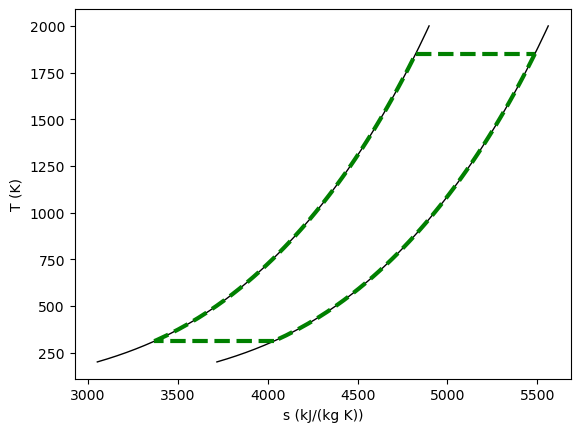

In [55]:
plt.figure()
plt.clf()

T = np.linspace(200, 2000, 1000) # range of temperatures
for v in [1/rho2_JperKgPerK,1/rho4_JperKgPerK]: #MPa
    S = [PropsSI('S','D',1/v,'T',t,fluid) for t in T]
    plt.plot(S, T, 'k-', lw=1)

plt.plot([s1_JperKgPerK, s2_JperKgPerK], [T1_K, T2_K], 'g--', lw=3) 

plt.xlabel('s (kJ/(kg K))')
plt.ylabel('T (K)')

T23 = np.linspace(T2_K, T3_K)
S23 = [PropsSI('S','T',t,'D',rho3_JperKgPerK,fluid) for t in T23]
plt.plot(S23, T23, 'g--', lw=3) 

plt.plot([s3_JperKgPerK, s4_JperKgPerK], [T3_K, T4_K], 'g--', lw=3) 

T41 = np.linspace(T4_K, T1_K)
S41 = [PropsSI('S','T',t,'D',rho4_JperKgPerK,fluid) for t in T41]
plt.plot(S41, T41, 'g--', lw=3) 

plt.savefig('stirlingCycleTSdiagram_plot.png')

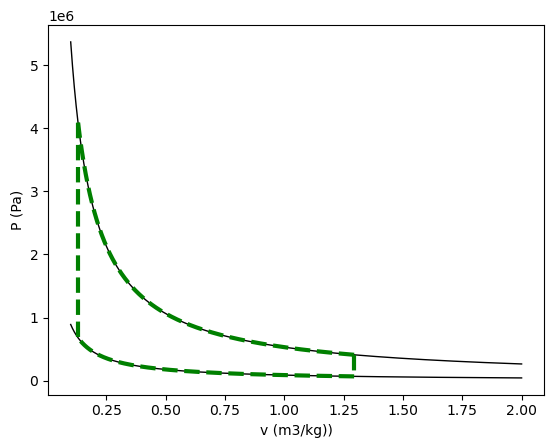

In [56]:
plt.figure()
plt.clf()

v4 = 1/rho4_JperKgPerK
v3 = 1/rho3_JperKgPerK

v2 = v3
v1 = v4

V = np.linspace(0.1, 2, 1000) # range of temperatures
for T in [T1_K,T3_K]: 
    p = [PropsSI('P','D',1/v,'T',T,fluid) for v in V]
    plt.plot(V, p, 'k-', lw=1)

plt.plot([v2, v3], [p2_Pa, p3_Pa], 'g--', lw=3) 

plt.xlabel('v (m3/kg))')
plt.ylabel('P (Pa)')

p34 = np.linspace(p3_Pa, p4_Pa,1000)
v34 = [1/PropsSI('D','P',t,'T',Tl_K,fluid) for t in p34]
plt.plot(v34, p34, 'g--', lw=3) 

plt.plot([v4, v1], [p4_Pa, p1_Pa], 'g--', lw=3) 

p12 = np.linspace(p2_Pa, p1_Pa,1000)
v12 = [1/PropsSI('D','P',t,'T',Th_K,fluid) for t in p12]
plt.plot(v12, p12, 'g--', lw=3) 

plt.savefig('stirlingCyclePVdiagram_plot.png')